In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [4]:
genre_columns = [col for col in df.columns if col.startswith('Frequency')]
df = df.drop(columns=genre_columns)

In [5]:
# Перетворення "Yes"/"No" у 1/0
binary_cols = ["While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
df[binary_cols] = df[binary_cols].map(lambda x: 1 if x == "Yes" else 0)

In [6]:
print(df.isnull().sum())

Timestamp                      0
Age                            1
Primary streaming service      1
Hours per day                  0
While working                  0
Instrumentalist                0
Composer                       0
Fav genre                      0
Exploratory                    0
Foreign languages              0
BPM                          107
Anxiety                        0
Depression                     0
Insomnia                       0
OCD                            0
Music effects                  8
Permissions                    0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
# Діапазони допустимих значень
valid_ranges = {
    "Age": (0, 120),
    "BPM": (1, 400),
    "Hours per day": (0, 24),
    "Anxiety": (0, 10),
    "Depression": (0, 10),
    "Insomnia": (0, 10),
    "OCD": (0, 10)
}

# Фільтрація значень у допустимих межах
for column, (min_val, max_val) in valid_ranges.items():
    df = df[(df[column] >= min_val) & (df[column] <= max_val)]

In [9]:
# Статистичний аналіз колонок
numeric_columns = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

# Створюємо словник для зберігання статистик
stats = {}

for column in numeric_columns:
    stats[column] = {
        'Математичне сподівання': df[column].mean(),
        'Медіана': df[column].median(),
        'Мода': df[column].mode().iloc[0],
        'Дисперсія': df[column].var(),
        'Середньоквадратичне відхилення': df[column].std()
    }

# Виводимо статистики
for column, metrics in stats.items():
    print(f"\nСтатистика для {column}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")


Статистика для Age:
Математичне сподівання: 24.73
Медіана: 21.00
Мода: 18.00
Дисперсія: 135.82
Середньоквадратичне відхилення: 11.65

Статистика для Hours per day:
Математичне сподівання: 3.72
Медіана: 3.00
Мода: 2.00
Дисперсія: 9.63
Середньоквадратичне відхилення: 3.10

Статистика для BPM:
Математичне сподівання: 123.28
Медіана: 120.00
Мода: 120.00
Дисперсія: 1088.09
Середньоквадратичне відхилення: 32.99

Статистика для Anxiety:
Математичне сподівання: 5.87
Медіана: 6.00
Мода: 7.00
Дисперсія: 7.63
Середньоквадратичне відхилення: 2.76

Статистика для Depression:
Математичне сподівання: 4.88
Медіана: 5.00
Мода: 7.00
Дисперсія: 8.98
Середньоквадратичне відхилення: 3.00

Статистика для Insomnia:
Математичне сподівання: 3.81
Медіана: 3.00
Мода: 0.00
Дисперсія: 9.66
Середньоквадратичне відхилення: 3.11

Статистика для OCD:
Математичне сподівання: 2.64
Медіана: 2.00
Мода: 0.00
Дисперсія: 8.08
Середньоквадратичне відхилення: 2.84


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

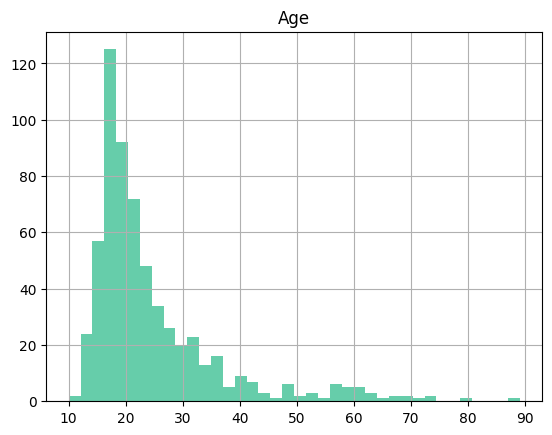

In [10]:
df.hist(['Age'], bins='auto', color='mediumaquamarine')

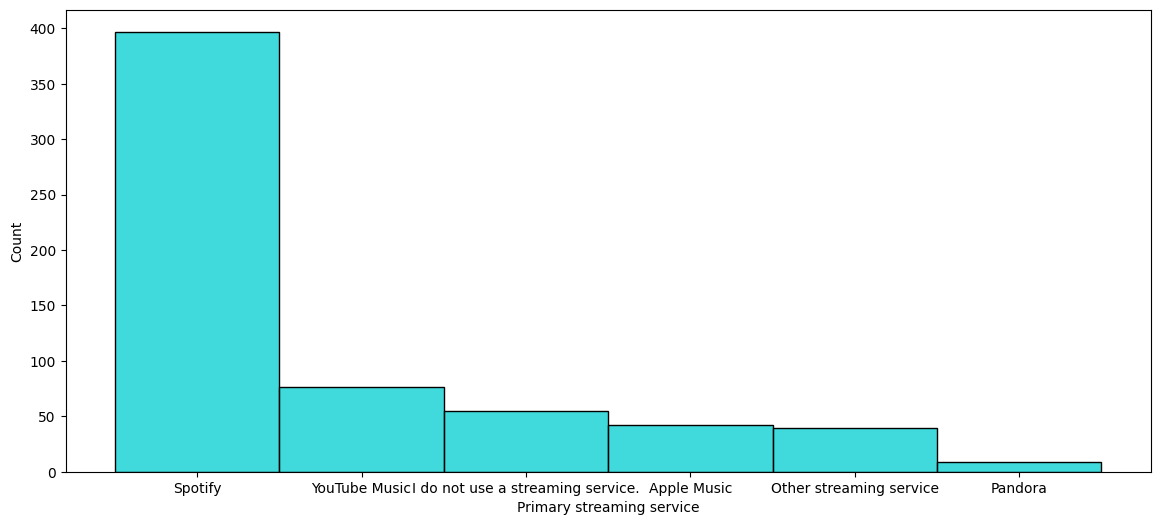

In [11]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Primary streaming service'], color='darkturquoise')
plt.show()

array([[<Axes: title={'center': 'Hours per day'}>]], dtype=object)

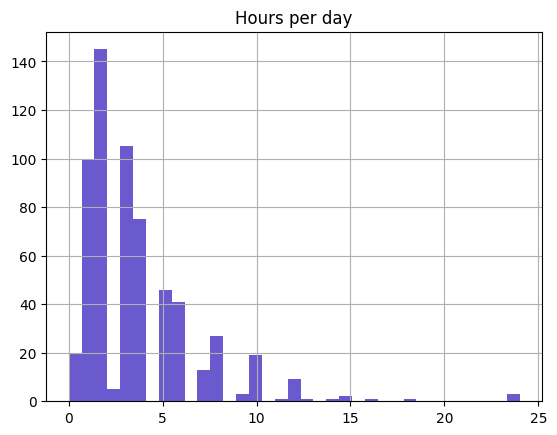

In [12]:
df.hist(['Hours per day'], bins='auto', color='slateblue')

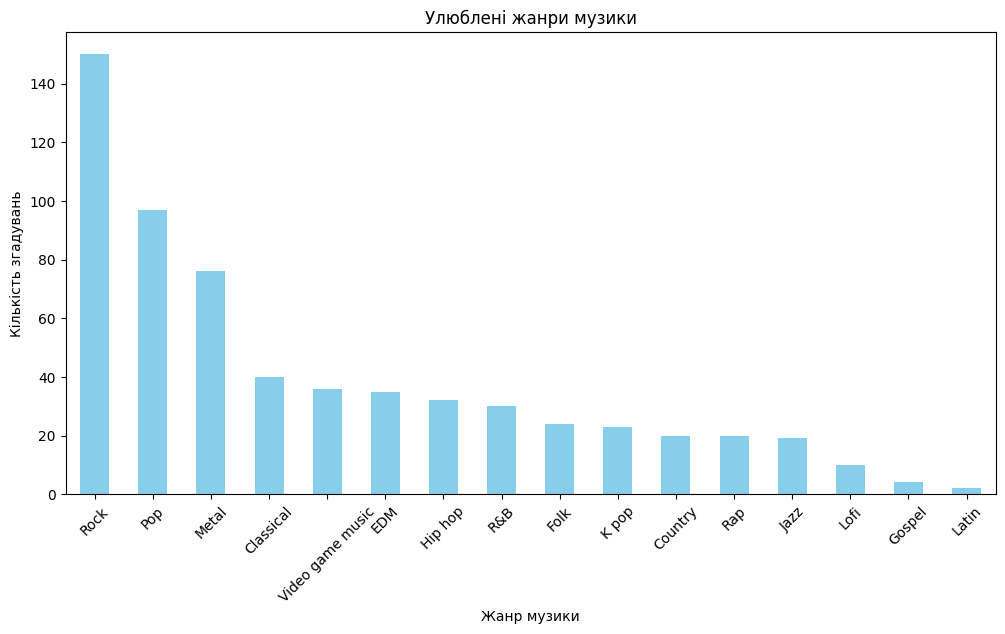

In [13]:
# Побудова гістограми частотності жанрів
plt.figure(figsize=(12, 6))
df["Fav genre"].value_counts().plot(kind="bar", color="skyblue")
plt.xlabel("Жанр музики")
plt.ylabel("Кількість згадувань")
plt.title("Улюблені жанри музики")
plt.xticks(rotation=45)
plt.show()

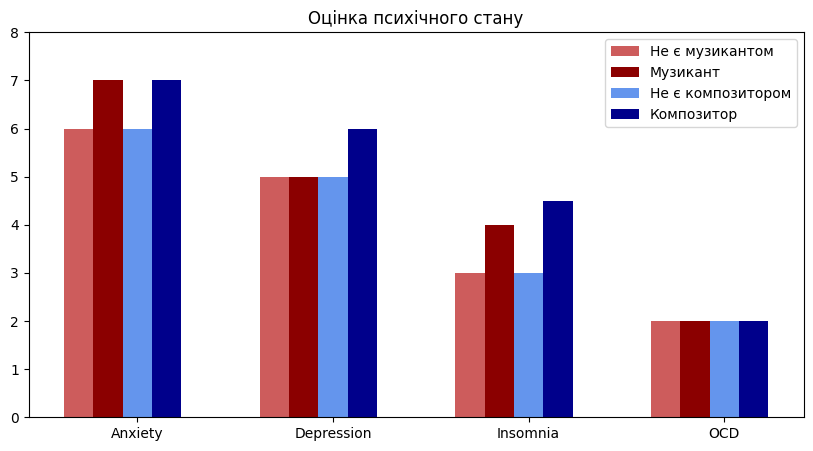

In [14]:
labels = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

# Вибираємо тільки числові значення перед підрахунком медіани
num_df = df.select_dtypes(include=[np.number])

b1 = ax.bar(x-2*width, num_df[df.Instrumentalist == 0].median()[-4:], width, color='indianred', label="Не є музикантом")
b2 = ax.bar(x-width, num_df[df.Instrumentalist == 1].median()[-4:], width, color='darkred', label="Музикант")
b3 = ax.bar(x, num_df[df.Composer == 0].median()[-4:], width, color='cornflowerblue', label="Не є композитором")
b4 = ax.bar(x+width, num_df[df.Composer == 1].median()[-4:], width, color='darkblue', label="Композитор")

ax.set_ylim([0, 8])
ax.set_title('Оцінка психічного стану')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [15]:
age = pd.Series(df.Age.head(10).values)

In [16]:
age

0    18.0
1    61.0
2    18.0
3    18.0
4    18.0
5    21.0
6    19.0
7    18.0
8    19.0
9    19.0
dtype: float64

In [17]:
pd.Series(19.0, range(3))

0    19.0
1    19.0
2    19.0
dtype: float64

In [18]:
age[0]

np.float64(18.0)

In [19]:
age.count()

np.int64(10)

In [20]:
age.mean()

np.float64(22.9)

In [21]:
age.min()

np.float64(18.0)

In [22]:
age.max()

np.float64(61.0)

In [23]:
age.std()

np.float64(13.42013412749664)

In [24]:
age.describe()

count    10.000000
mean     22.900000
std      13.420134
min      18.000000
25%      18.000000
50%      18.500000
75%      19.000000
max      61.000000
dtype: float64

In [25]:
age = pd.Series(df.Age.reset_index(drop=True).loc[10:14].values, index=['Miles', 'Kevin', 'Molly', 'Kylie', 'Mark'])

In [26]:
age

Miles    18.0
Kevin    16.0
Molly    16.0
Kylie    17.0
Mark     15.0
dtype: float64

In [27]:
age = pd.Series({'Miles': 18, 'Kevin': 16, 'Molly': 16, 'Kylie': 17, 'Mark': 15})

In [28]:
age

Miles    18
Kevin    16
Molly    16
Kylie    17
Mark     15
dtype: int64

In [29]:
age['Molly']

np.int64(16)

In [30]:
age.Kevin

np.int64(16)

In [31]:
age.dtype

dtype('int64')

In [32]:
age.values

array([18, 16, 16, 17, 15])

In [33]:
services = pd.Series(df['Primary streaming service'].head().values)

In [34]:
services

0          Spotify
1    YouTube Music
2          Spotify
3          Spotify
4    YouTube Music
dtype: object

In [35]:
services.str.contains('S')

0     True
1    False
2     True
3     True
4    False
dtype: bool

In [36]:
services.str.upper()

0          SPOTIFY
1    YOUTUBE MUSIC
2          SPOTIFY
3          SPOTIFY
4    YOUTUBE MUSIC
dtype: object

In [37]:
mental_state_dict = {'Miles': [6, 4, 7, 0], 'Kevin': [8, 8, 4, 3], 'Molly': [5, 7, 10, 0], 'Kylie': [7, 5, 0, 3], 'Mark': [7, 3, 0, 2]}

In [38]:
mental_state = pd.DataFrame(mental_state_dict)

In [39]:
mental_state

,Miles,Kevin,Molly,Kylie,Mark
0,6,8,5,7,7
1,4,8,7,5,3
2,7,4,10,0,0
3,0,3,0,3,2


In [40]:
pd.DataFrame(mental_state_dict, index=['Anxiety', 'Depression', 'Insomnia', 'OCD'])

,Miles,Kevin,Molly,Kylie,Mark
Anxiety,6,8,5,7,7
Depression,4,8,7,5,3
Insomnia,7,4,10,0,0
OCD,0,3,0,3,2


In [41]:
mental_state.index = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

In [42]:
mental_state

,Miles,Kevin,Molly,Kylie,Mark
Anxiety,6,8,5,7,7
Depression,4,8,7,5,3
Insomnia,7,4,10,0,0
OCD,0,3,0,3,2


In [43]:
mental_state['Molly']

Anxiety        5
Depression     7
Insomnia      10
OCD            0
Name: Molly, dtype: int64

In [44]:
mental_state.Kevin

Anxiety       8
Depression    8
Insomnia      4
OCD           3
Name: Kevin, dtype: int64

In [45]:
mental_state.loc['Anxiety']

Miles    6
Kevin    8
Molly    5
Kylie    7
Mark     7
Name: Anxiety, dtype: int64

In [46]:
mental_state.iloc[1]

Miles    4
Kevin    8
Molly    7
Kylie    5
Mark     3
Name: Depression, dtype: int64

In [47]:
mental_state.loc['Anxiety':'Insomnia']

,Miles,Kevin,Molly,Kylie,Mark
Anxiety,6,8,5,7,7
Depression,4,8,7,5,3
Insomnia,7,4,10,0,0


In [48]:
mental_state.iloc[1:4]

,Miles,Kevin,Molly,Kylie,Mark
Depression,4,8,7,5,3
Insomnia,7,4,10,0,0
OCD,0,3,0,3,2


In [49]:
mental_state.loc[['Anxiety', 'Insomnia']]

,Miles,Kevin,Molly,Kylie,Mark
Anxiety,6,8,5,7,7
Insomnia,7,4,10,0,0


In [50]:
mental_state.iloc[[1, 3]]

,Miles,Kevin,Molly,Kylie,Mark
Depression,4,8,7,5,3
OCD,0,3,0,3,2


In [51]:
mental_state.loc['Depression':'OCD', ['Kevin', 'Molly']]

,Kevin,Molly
Depression,8,7
Insomnia,4,10
OCD,3,0


In [52]:
mental_state.iloc[[0, 3], 2:4]

,Molly,Kylie
Anxiety,5,7
OCD,0,3


In [53]:
mental_state[mental_state >= 5]

,Miles,Kevin,Molly,Kylie,Mark
Anxiety,6.0,8.0,5.0,7.0,7.0
Depression,NaN,8.0,7.0,5.0,NaN
Insomnia,7.0,NaN,10.0,NaN,NaN
OCD,NaN,NaN,NaN,NaN,NaN


In [54]:
mental_state.at['Anxiety', 'Molly']

np.int64(5)

In [55]:
mental_state.iat[0, 4]

np.int64(7)

In [56]:
mental_state.at['Anxiety', 'Molly'] = 4

In [57]:
mental_state.at['Anxiety', 'Molly']

np.int64(4)

In [58]:
mental_state.iat[0, 4] = 8

In [59]:
mental_state.iat[0, 4]

np.int64(8)

In [60]:
mental_state.describe()

,Miles,Kevin,Molly,Kylie,Mark
count,4.000000,4.000000,4.000000,4.000000,4.00000
mean,4.250000,5.750000,5.250000,3.750000,3.25000
std,3.095696,2.629956,4.272002,2.986079,3.40343
min,0.000000,3.000000,0.000000,0.000000,0.00000
25%,3.000000,3.750000,3.000000,2.250000,1.50000
50%,5.000000,6.000000,5.500000,4.000000,2.50000
75%,6.250000,8.000000,7.750000,5.500000,4.25000
max,7.000000,8.000000,10.000000,7.000000,8.00000


In [61]:
pd.set_option('display.precision', 2)

In [62]:
mental_state.describe()

,Miles,Kevin,Molly,Kylie,Mark
count,4.00,4.00,4.00,4.00,4.00
mean,4.25,5.75,5.25,3.75,3.25
std,3.10,2.63,4.27,2.99,3.40
min,0.00,3.00,0.00,0.00,0.00
25%,3.00,3.75,3.00,2.25,1.50
50%,5.00,6.00,5.50,4.00,2.50
75%,6.25,8.00,7.75,5.50,4.25
max,7.00,8.00,10.00,7.00,8.00


In [63]:
mental_state.mean()

Miles    4.25
Kevin    5.75
Molly    5.25
Kylie    3.75
Mark     3.25
dtype: float64

In [64]:
mental_state.T

,Anxiety,Depression,Insomnia,OCD
Miles,6,4,7,0
Kevin,8,8,4,3
Molly,4,7,10,0
Kylie,7,5,0,3
Mark,8,3,0,2


In [65]:
mental_state.T.describe()

,Anxiety,Depression,Insomnia,OCD
count,5.00,5.00,5.00,5.00
mean,6.60,5.40,4.20,1.60
std,1.67,2.07,4.38,1.52
min,4.00,3.00,0.00,0.00
25%,6.00,4.00,0.00,0.00
50%,7.00,5.00,4.00,2.00
75%,8.00,7.00,7.00,3.00
max,8.00,8.00,10.00,3.00


In [66]:
mental_state.T.mean()

Anxiety       6.6
Depression    5.4
Insomnia      4.2
OCD           1.6
dtype: float64

In [67]:
mental_state.sort_index(ascending=False)

,Miles,Kevin,Molly,Kylie,Mark
OCD,0,3,0,3,2
Insomnia,7,4,10,0,0
Depression,4,8,7,5,3
Anxiety,6,8,4,7,8


In [68]:
mental_state.sort_index(axis=1)

,Kevin,Kylie,Mark,Miles,Molly
Anxiety,8,7,8,6,4
Depression,8,5,3,4,7
Insomnia,4,0,0,7,10
OCD,3,3,2,0,0


In [69]:
mental_state.sort_values(by='Insomnia', axis=1, ascending=False)

,Molly,Miles,Kevin,Kylie,Mark
Anxiety,4,6,8,7,8
Depression,7,4,8,5,3
Insomnia,10,7,4,0,0
OCD,0,0,3,3,2


In [70]:
mental_state.T.sort_values(by='Anxiety', ascending=False)

,Anxiety,Depression,Insomnia,OCD
Kevin,8,8,4,3
Mark,8,3,0,2
Kylie,7,5,0,3
Miles,6,4,7,0
Molly,4,7,10,0


In [71]:
mental_state.loc['OCD'].sort_values(ascending=False)

Kevin    3
Kylie    3
Mark     2
Miles    0
Molly    0
Name: OCD, dtype: int64

In [72]:
mental_state

,Miles,Kevin,Molly,Kylie,Mark
Anxiety,6,8,4,7,8
Depression,4,8,7,5,3
Insomnia,7,4,10,0,0
OCD,0,3,0,3,2


In [73]:
mental_state.sort_values(by='Miles', ascending=False, inplace=True)

In [74]:
mental_state

,Miles,Kevin,Molly,Kylie,Mark
Insomnia,7,4,10,0,0
Anxiety,6,8,4,7,8
Depression,4,8,7,5,3
OCD,0,3,0,3,2


In [75]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

In [76]:
pd.set_option('display.precision', 2)

In [77]:
titanic.head()

,rownames,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [78]:
titanic.tail()

,rownames,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [79]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [80]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [81]:
titanic.loc[titanic.age == titanic.age.min()]

,name,survived,sex,age,class
763,"Dean, Miss. Elizabeth Gladys M",yes,female,0.17,3rd


In [82]:
titanic.loc[titanic.age == titanic.age.max()]

,name,survived,sex,age,class
14,"Barkworth, Mr. Algernon Henry W",yes,male,80.0,1st


In [83]:
titanic.age.mean()

np.float64(29.881134512434034)

In [84]:
titanic[titanic.survived == 'yes'].describe()

,age
count,427.00
mean,28.92
std,15.06
min,0.17
25%,20.00
50%,28.00
75%,38.00
max,80.00


In [85]:
women_first_class = titanic[(titanic["sex"] == "female") & (titanic["class"] == "1st")]

In [86]:
women_first_class.loc[women_first_class.age == women_first_class.age.min()]

,name,survived,sex,age,class
2,"Allison, Miss. Helen Loraine",no,female,2.0,1st


In [87]:
women_first_class.loc[women_first_class.age == women_first_class.age.max()]

,name,survived,sex,age,class
61,"Cavendish, Mrs. Tyrell William",yes,female,76.0,1st


In [88]:
women_first_class[women_first_class["survived"] == "yes"].shape[0]

139

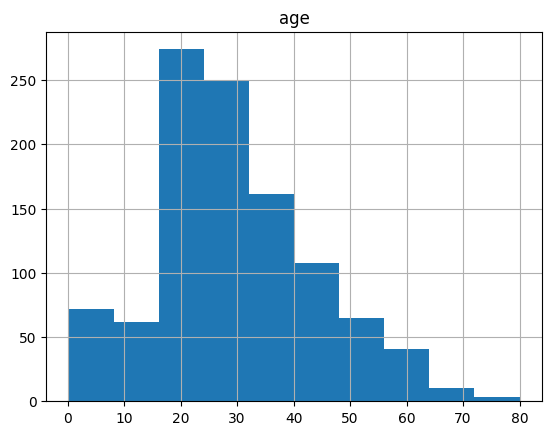

In [89]:
histogram = titanic.hist()

<Axes: xlabel='age', ylabel='Count'>

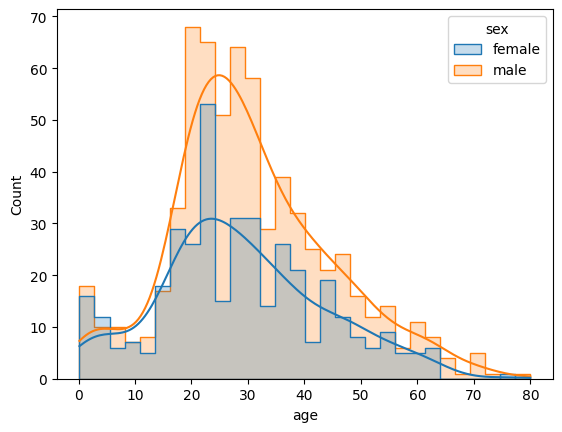

In [90]:
sns.histplot(titanic, x="age", hue="sex", bins=30, kde=True, element="step", stat="count")